In [166]:
%pip install seaborn
%pip install folium

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [167]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [107]:
import pandas as pd
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(filepath, header=None)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [108]:
df = df.rename(columns=df.iloc[0]).drop(df.index[0])

In [109]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
1,1/31/1980,1980,Jan,1,108.24,0.5,27483.571,1558,7,60.223,0.01,5.4,456,Supperminicar,Georgia
2,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594224,4.8,555.9,Supperminicar,New York
3,3/31/1980,1980,Mar,1,107.48,0.2,28238.443,3137,3,35.141,-0.30861387,3.4,620,Mediumfamilycar,New York
4,4/30/1980,1980,Apr,1,115.01,1,32615.149,1653,7,45.673,0.230595757,4.2,702.8,Supperminicar,Illinois
5,5/31/1980,1980,May,1,98.72,0.2,23829.233,1319,4,52.997,0.138196502,5.3,770.4,Smallfamiliycar,California


In [110]:
df.describe()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
count,528,528,528,528,528,528,528,528,528,528,528,528,528,528,528
unique,528,44,12,2,488,10,528,494,7,525,528,49,524,5,4
top,1/31/1980,1980,Jan,0,98.5,0.5,27483.571,1814,7,35.418,0.01,2.5,632.9,Mediumfamilycar,New York
freq,1,12,44,415,3,88,1,2,83,2,1,29,2,166,144


In [111]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [112]:
####     Creating Visualizations for Data Analysis¶     ####

In [113]:
df['Automobile_Sales'] = df['Automobile_Sales'].astype(str).astype(float)
#df['Automobile_Sales'] = df['Automobile_Sales'].astype(float).astype(int)

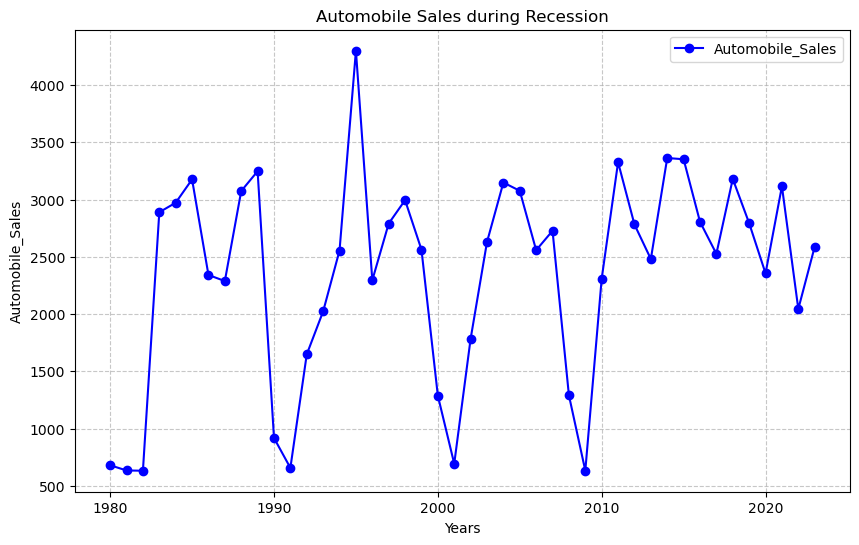

In [114]:
###  TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate
               # from year to year

df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

plt.figure(figsize=(10,6))
df_line.plot(kind='line',marker='o',color='b')

plt.xlabel('Years')
plt.ylabel('Automobile_Sales')
plt.title('Automobile Sales during Recession')

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend()
plt.show()

In [115]:
### TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question is
#          there a noticeable difference in sales trends between different vehicle types during recession periods?

df_Mline = df.groupby(['Year','Vehicle_Type'],as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year',inplace=True)
df_Mline

,Vehicle_Type,Automobile_Sales
Year,,
1980,Mediumfamilycar,2882.5
1980,Smallfamiliycar,2085.7
1980,Supperminicar,3179.2
1981,Mediumfamilycar,1885.2
1981,Smallfamiliycar,3192.1
...,...,...
2022,Sports,4596.5
2023,Executivecar,1579.6
2023,Smallfamiliycar,10658.5


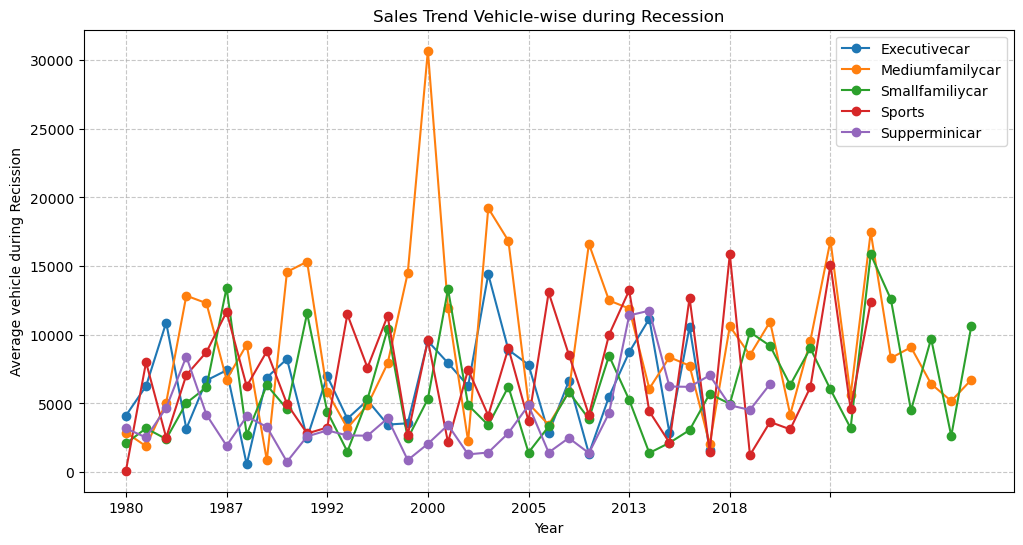

In [116]:
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line',marker='o',figsize=(12,6))

plt.xlabel('Year')
plt.ylabel('Average vehicle during Recission')
plt.title('Sales Trend Vehicle-wise during Recession')

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend()
plt.show()

In [117]:
# Inference:

 # From this plot, we can understand that during recession period:
 # Medium family cars & small family cars have shown a consistent growth in sales during recession periods.
 # Sports cars relatively low sales, because of the high cost of the vehicle.
 # Supermini cars & Executive cars have gradually lost their appeal as a preferred choice during recession periods.

In [118]:
### TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per
#             vehicle type for a recession period with a non-recession period.

# group recession average Automobile_Sales and then plot it
#Make use of sns.barplot(x=x,y=y, data = df)
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
new_df

,Recession,Automobile_Sales
0,0,2816.753590
1,1,648.516814


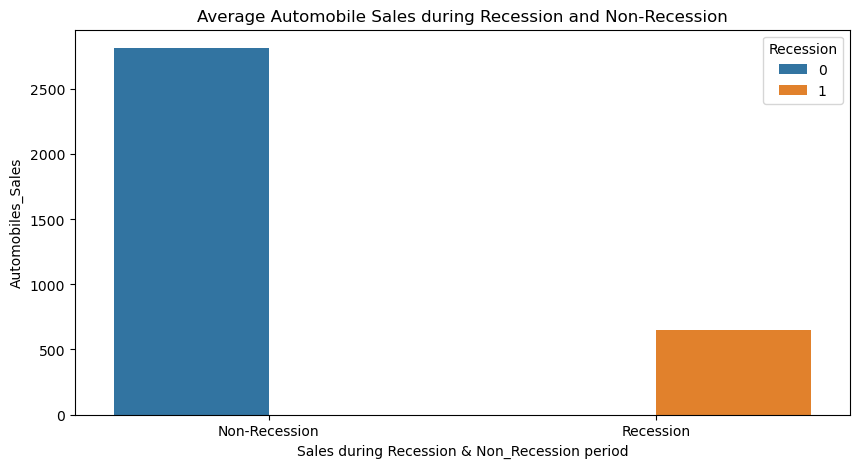

In [119]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=new_df)
plt.xlabel('Sales during Recession & Non_Recession period')
plt.ylabel('Automobiles_Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

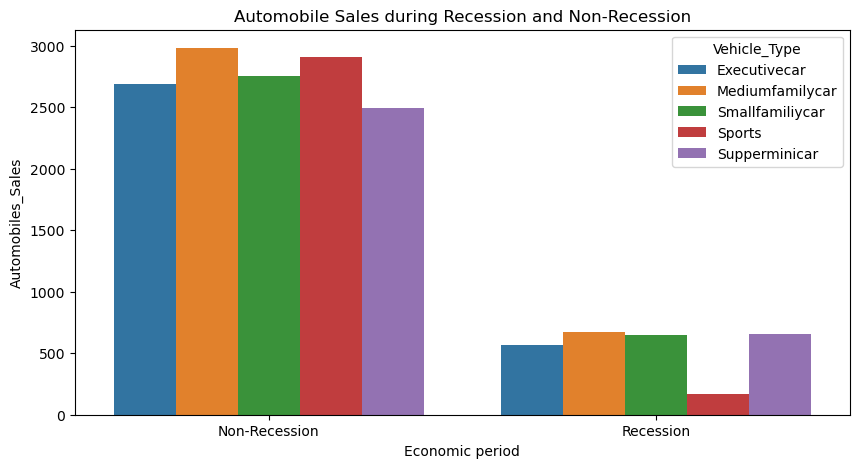

In [120]:
# Filter the data for recessionary periods
#recession_data = df[df['Recession'] == 1]
new_df1 = df.groupby(['Recession' , 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='Recession', y='Automobile_Sales',hue=('Vehicle_Type'), data=new_df1)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Economic period')
plt.ylabel('Automobiles_Sales')
plt.title('Automobile Sales during Recession and Non-Recession')

plt.show()


In [121]:
 ########  Inference:
# From the above plot :
# There is a drastic change in the automobile sales during the Recession period.
# Executive cars & sports cars are mostly affeceted because of their costs.

In [122]:
df['GDP'] = df['GDP'].astype(str).astype(float)
df['GDP'] = df['GDP'].astype(float).astype(int)

In [123]:
df['Recession'] = df['Recession'].astype(str).astype(float)
df['Recession'] = df['Recession'].astype(float).astype(int)

In [124]:
df['Year'] = df['Year'].astype(str).astype(float)
df['Year'] = df['Year'].astype(float).astype(int)

C:\Users\srika\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srika\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srika\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srika\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

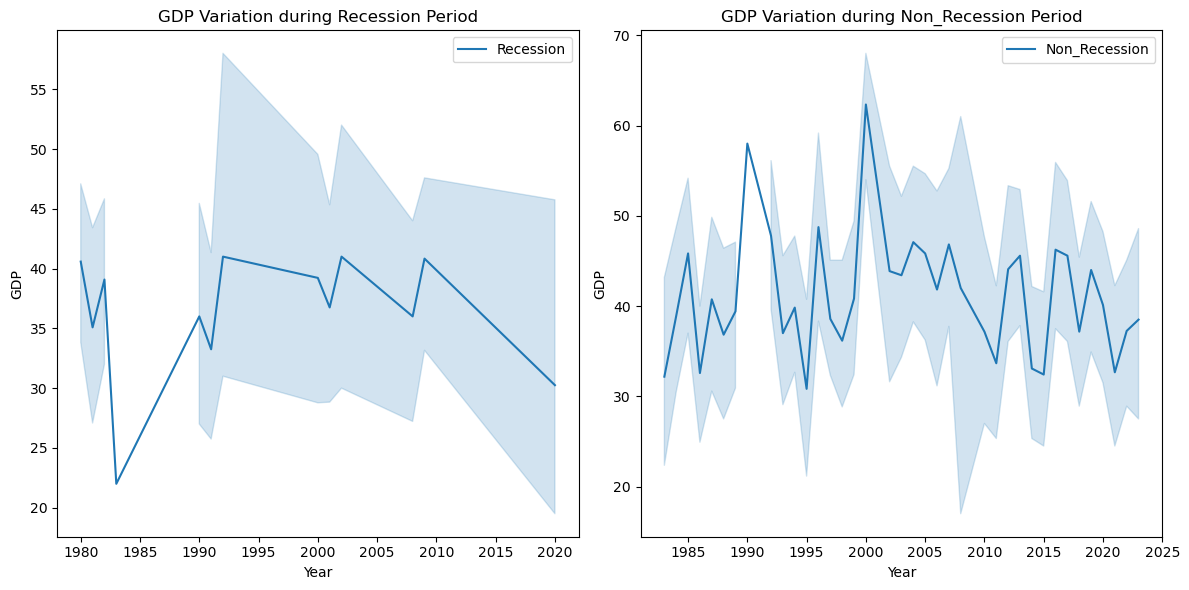

In [125]:
#### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by 
#               developing line plots for each period.

# Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]
plt.figure(figsize=(12, 6))
    
 #subplot 1
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Recession Period')
plt.legend()

#subplot 1
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non_Recession')
plt.xlabel('Year')    
plt.ylabel('GDP')
plt.title('GDP Variation during Non_Recession Period')
plt.legend()

plt.tight_layout()
plt.show()

In [126]:
##### Inference
# From the above plot the GDP is very low during recession period it affects the overall sales.

In [127]:
df['Seasonality_Weight'] = df['Seasonality_Weight'].astype(str).astype(float)
df['Seasonality_Weight'] = df['Seasonality_Weight'].astype(float).astype(int)

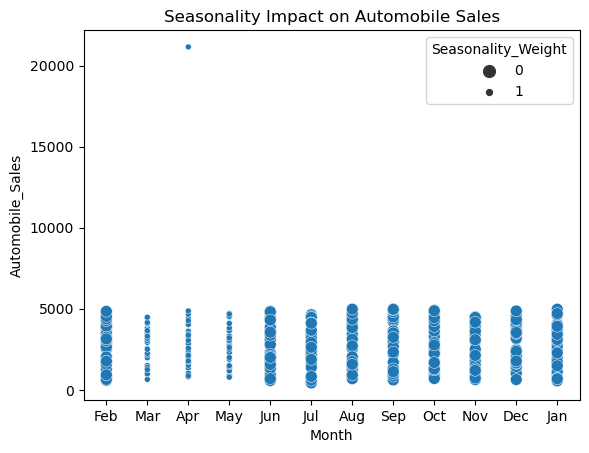

In [128]:
### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

non_rec_data = df[df['Recession']==0]
size = non_rec_data['Seasonality_Weight']   #for bubble effect

sns.scatterplot(data=non_rec_data,x='Month',y='Automobile_Sales',size=size)
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality Impact on Automobile Sales')

plt.show()

In [129]:
#####   Inference
#  From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a
# drastic raise in sales in the month of April

In [130]:
df['Consumer_Confidence'] = df['Consumer_Confidence'].astype(str).astype(float)
#df['Seasonality_Weight'] = df['Seasonality_Weight'].astype(float).astype(int)

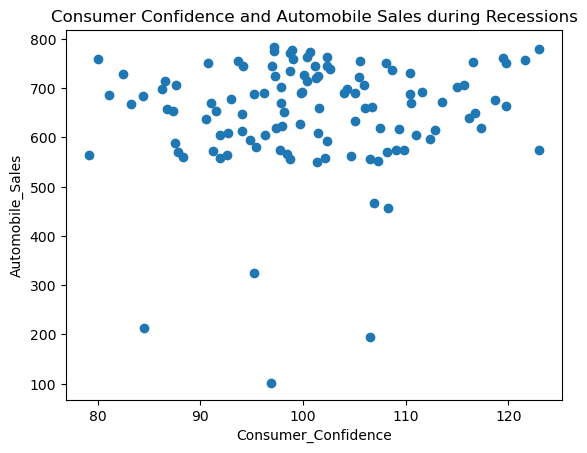

In [131]:
####  TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between
#               average vehicle price relate to the sales volume during recessions.

rec_data = df[df['Recession']==1]
plt.scatter(rec_data['Consumer_Confidence'],rec_data['Automobile_Sales'])
plt.xlabel('Consumer_Confidence')
plt.ylabel('Automobile_Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')

plt.show()

In [132]:
df['Price'] = df['Price'].astype(str).astype(float)
#df['Price'] = df['Price'].astype(float).astype(int)

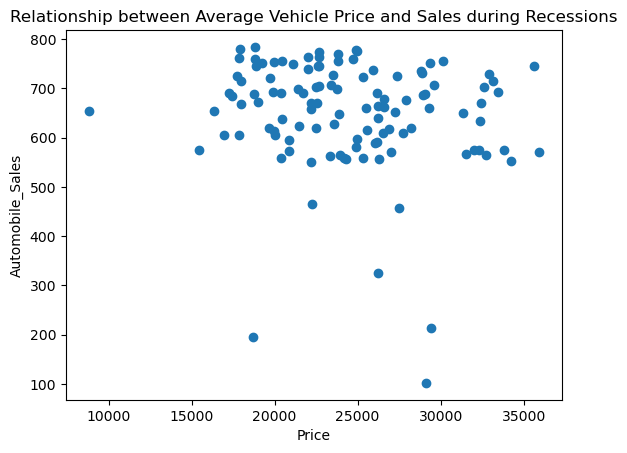

In [133]:
# How does the average vehicle price relate to the sales volume during recessions?

rec_data = df[df['Recession']==1]
plt.scatter(rec_data['Price'],rec_data['Automobile_Sales'])
plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

In [134]:
####  Inference
# There is not much relation!

In [143]:
df['Advertising_Expenditure'] = df['Advertising_Expenditure'].astype(str).astype(float)
df['Advertising_Expenditure'] = df['Advertising_Expenditure'].astype(float).astype(int)

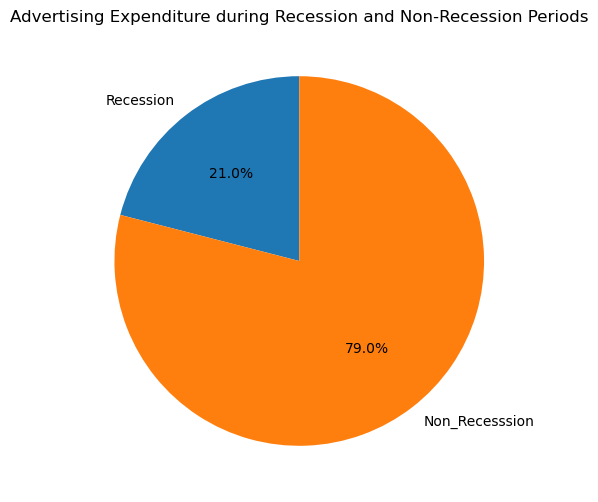

In [144]:
#####  TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during               
#                 recession and non-recession periods.

Rec = df[df['Recession']==1]
Nrec = df[df['Recession']==0]

Rtotal = Rec['Advertising_Expenditure'].sum()
NRtotal = Nrec['Advertising_Expenditure'].sum()

plt.figure(figsize=(8,6))
labels = ['Recession','Non_Recesssion']
sizes = [Rtotal,NRtotal]
plt.pie(sizes,labels = labels,autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()

In [145]:
#####     Inference:
#  From the above plot XYZAutomotives spent more money on the advertising the products during non recession period 
# comparitive to recession period.

In [149]:
#df['Vehicle_Type'] = df['Vehicle_Type'].astype(str).astype(float)
#df['Advertising_Expenditure'] = df['Advertising_Expenditure'].astype(float).astype(int)

In [150]:
####  TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during 
#               recession period.

Recession = df[df['Recession']==1] 
vehicle_type = Recession.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
vehicle_type

,Vehicle_Type,Advertising_Expenditure
0,Executivecar,3243
1,Mediumfamilycar,130612
2,Smallfamiliycar,102759
3,Sports,12568
4,Supperminicar,90728


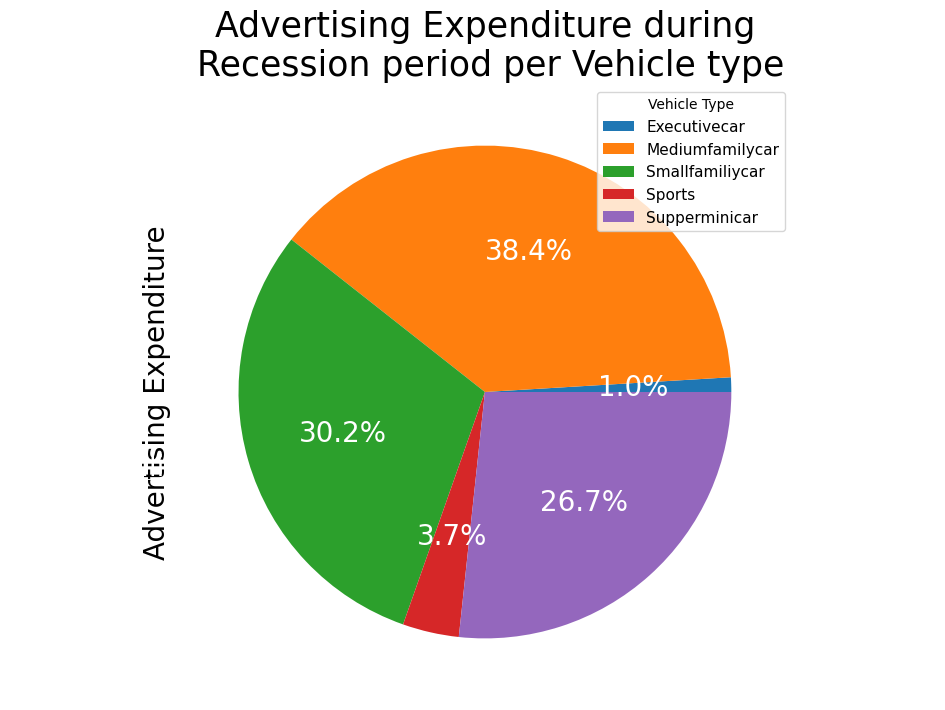

In [154]:
temp=df[df["Recession"]==1].groupby("Vehicle_Type")["Advertising_Expenditure"].sum()
temp.plot(kind="pie",
          figsize=(12, 8),
          autopct='%1.1f%%',
          y="Advertising_Expenditure",
          textprops={'color':"w", "size":20},
         )
plt.ylabel(ylabel="Advertising Expenditure",fontsize=20)
plt.title(label="Advertising Expenditure during\n Recession period per Vehicle type",fontsize=25)
plt.legend(title="Vehicle Type", loc="best", fontsize=11)
plt.show()

In [139]:
#####  Inference
#   During recession the advertisements were mostly focued on low price range vehicle compartive high price 
#     vehicles.

In [140]:
df['unemployment_rate'] = df['unemployment_rate'].astype(str).astype(float)
df['unemployment_rate'] = df['unemployment_rate'].astype(float).astype(int)

C:\Users\srika\AppData\Local\Temp\ipykernel_51136\197840842.py:8: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
C:\Users\srika\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srika\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


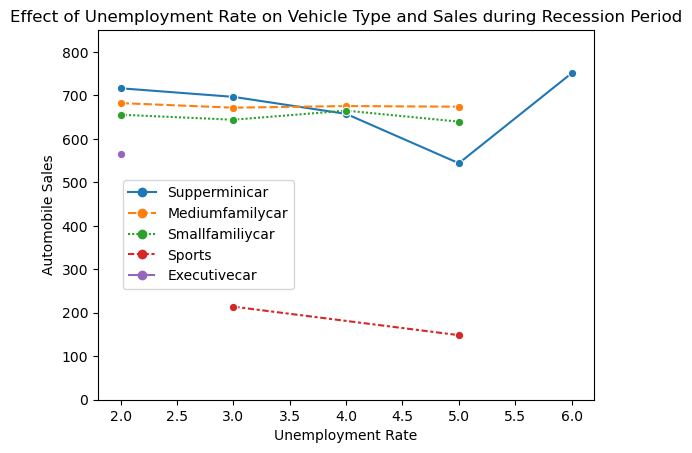

In [141]:
 ### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during
  #            the Recession Period

# Filter out the data for the recession period
df_rec = df[df['Recession'] == 1]

# Create a lineplot to analyze the effect of the unemployment rate on vehicle type and sales
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)

plt.ylim(0, 850)  # Set the y-axis limit for better visualization
plt.legend(loc=(0.05, 0.3))  # Adjust the legend position for better readability

plt.title('Effect of Unemployment Rate on Vehicle Type and Sales during Recession Period')
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')

plt.show()

In [142]:
#         Inference
# During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and
 #mediumminicar


In [165]:
yearly_data = df[df['Recession']==0] 
yearly_sales= yearly_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
Y_chart1 = figure=px.line(
                    yearly_sales,
                        x='Year',
                        y='Automobile_Sales',
                        title="Yearly Automobile Sales for the year {input_year}"
        )
     


NameError: name 'px' is not defined